# Linear Regression 
## Bike Sharing Assignment
### Problem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Business Goal:
   You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### The steps we follows are :
1. Reading, Understanding and visualising the data.
2. Preparing the data for modelling(train-test split, rescaling etc.)
3. Training the model.
4. Residual Analysis.
5. Predictions and Evaluation on the test set.

##  1. Reading, Understanding and visualising the data.

In [2]:
# importing required libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing and loading Dataset.
df = pd.read_csv(r"C:\Users\admin\Downloads\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking shape of the data.
df.shape

(730, 16)

In [5]:
# Checking the Dtype and null values of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking every details of the data.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Convertion of variables like 'weathersit' and 'season' have values as 1, 2, 3 and 1, 2, 3, 4 which have specific labels associated with it.
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Misty', 3:'Light Rain'}))
df[['season']] = df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping the irrelevant columns.
df = df.drop(columns = ["instant", "dteday"])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


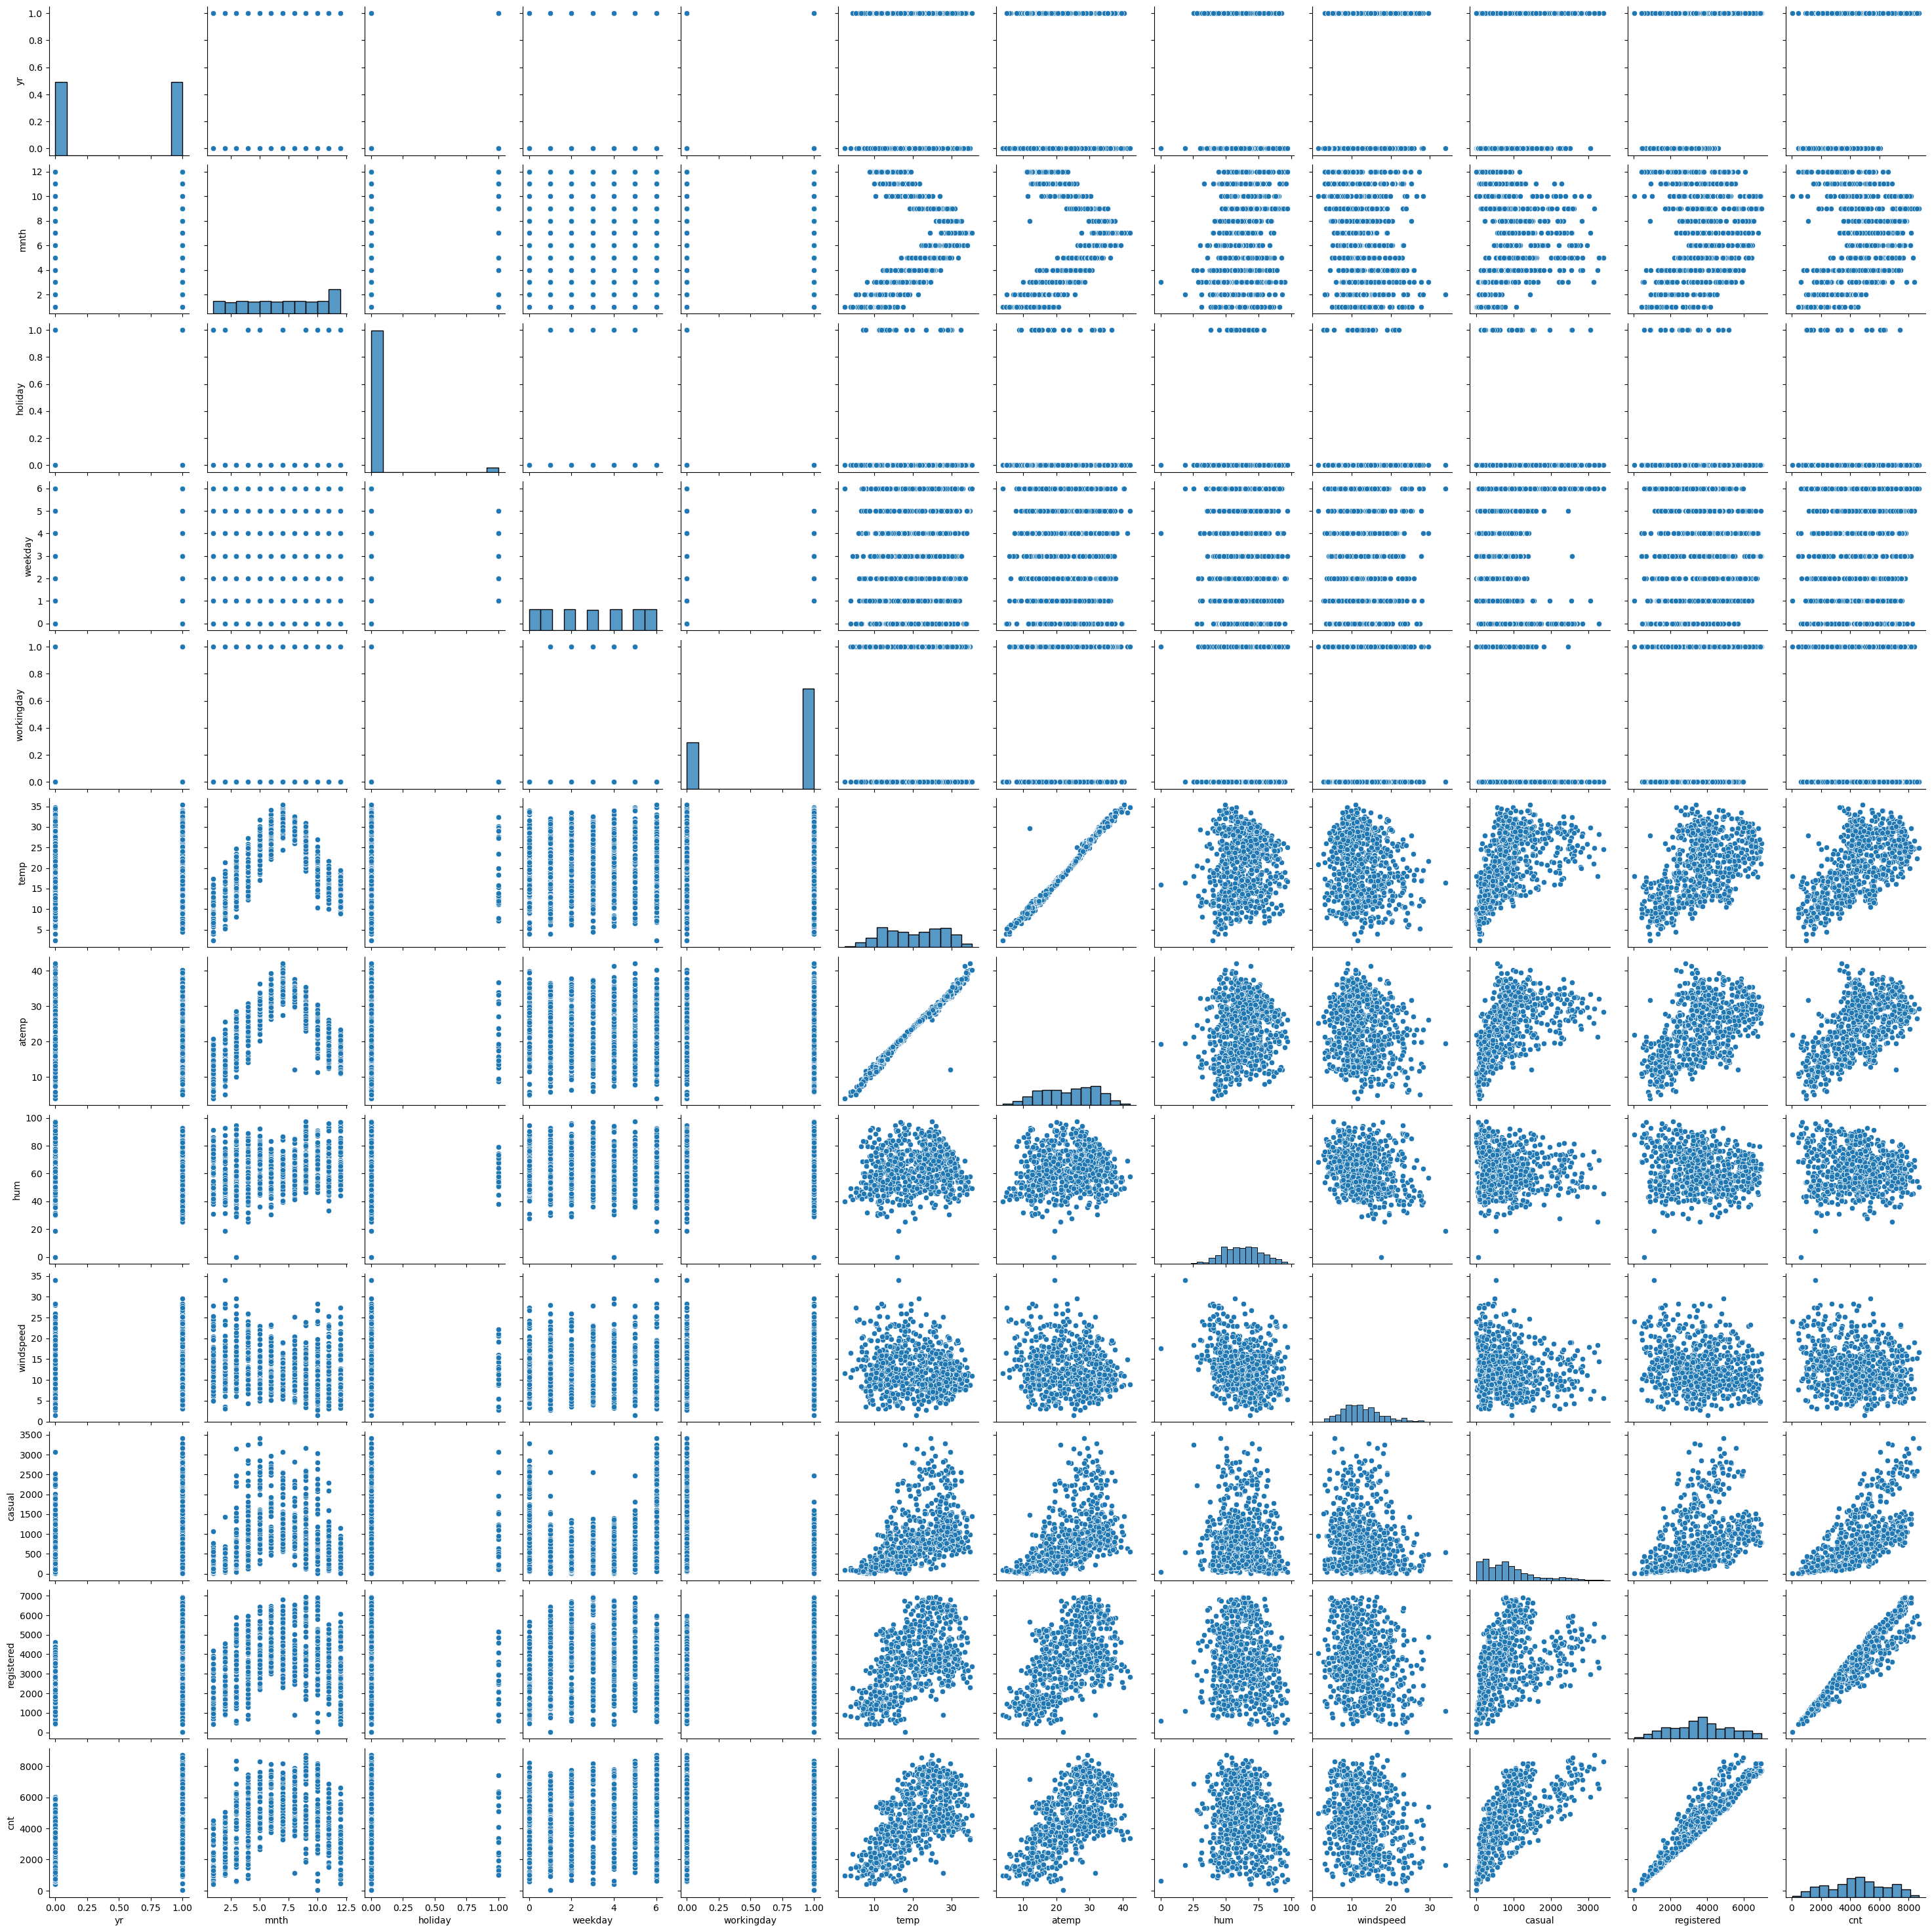

In [9]:
# Visualising the numerical variables in the dataset.
sns.pairplot(df)
plt.show()

<Axes: xlabel='season', ylabel='cnt'>

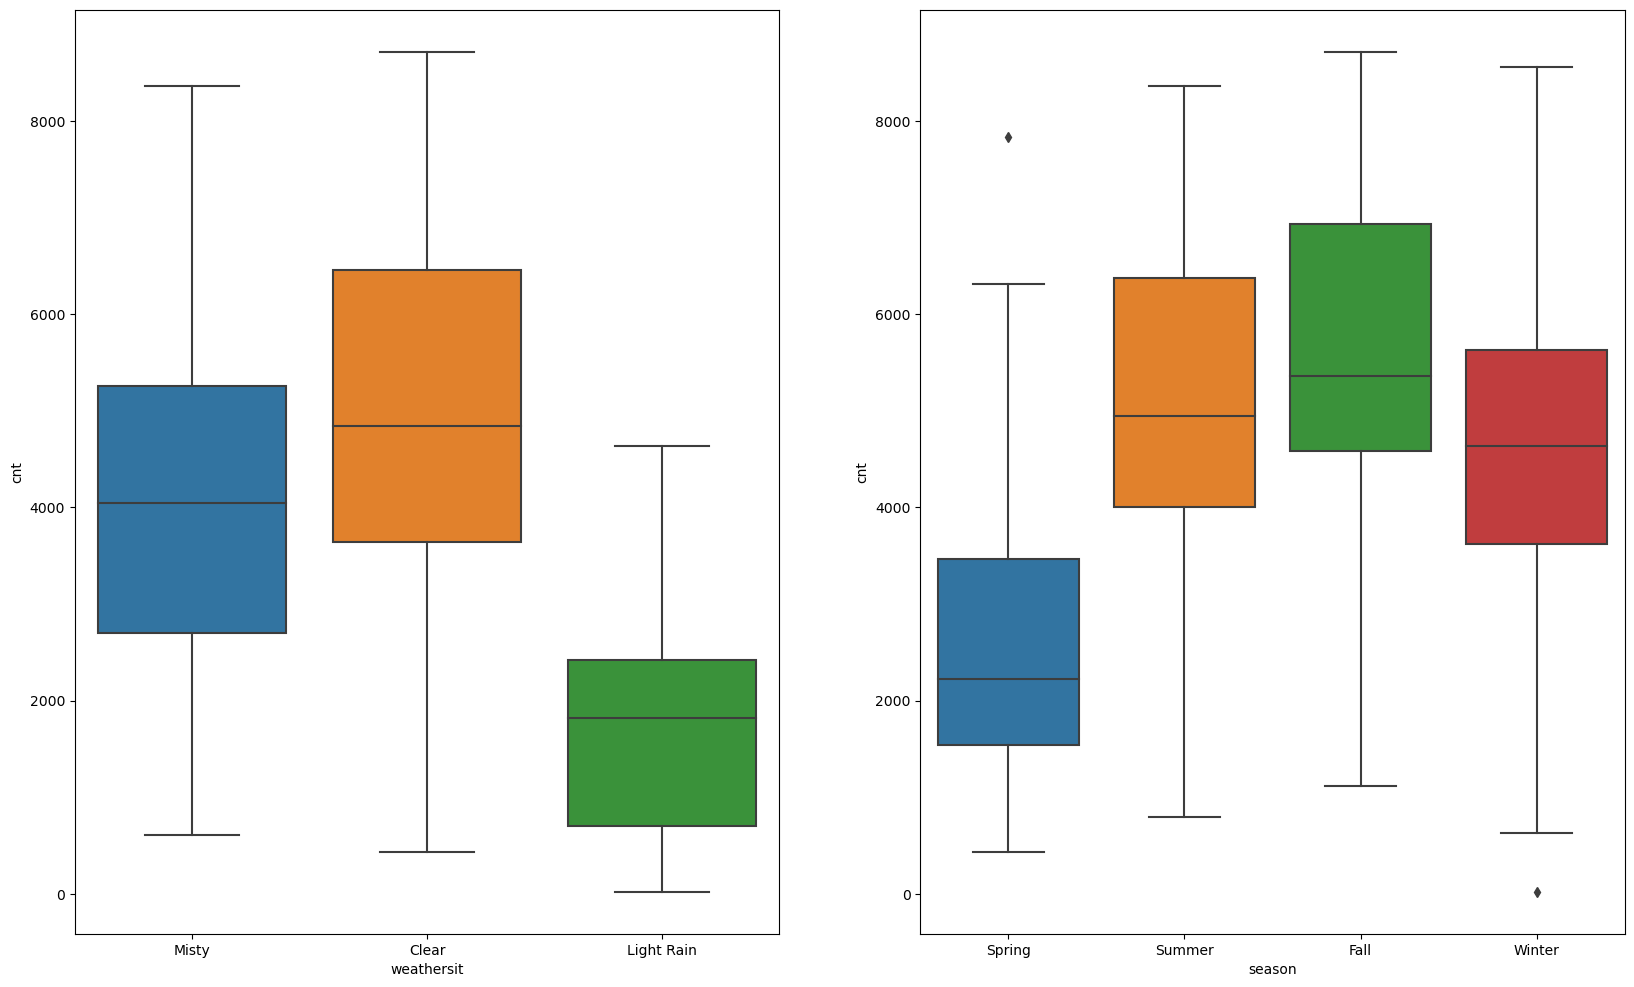

In [10]:
# Visualising the categorical variables in the dataset.
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1) #total 1 rows in plot ,total 2 columns in rows , 1st index of current plot
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(1,2,2) #total 1 rows in plot ,total 2 columns in rows , 2nd index of current plot
sns.boxplot(x = 'season', y = 'cnt', data = df)

## 2. Preparing the data for modelling(train-test split, rescaling etc.)

In [11]:
df.weathersit.value_counts()

Clear         463
Misty         246
Light Rain     21
Name: weathersit, dtype: int64

In [12]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [13]:
# Creating Dummy variables with k-1 columns where k = number of individual unique value.
status = pd.get_dummies(df['weathersit'])
status.head()

,Clear,Light Rain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
# Removing the first column as it is not required or an extra step.
status = pd.get_dummies(df['weathersit'], drop_first = True)
status.head()

,Light Rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [15]:
status1 = pd.get_dummies(df['season'])
status1.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [16]:
status1 = pd.get_dummies(df['season'], drop_first = True)
status1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
# Concatenating it to the original Dataframe and dropping the original Column as it is no longer need and is redundant.
df = pd.concat([df, status, status1], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Rain,Misty,Spring,Summer,Winter
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [18]:
df = df.drop(columns = ["weathersit", "season"])
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light Rain,Misty,Spring,Summer,Winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [19]:
# Building the model by train-test split.
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 17)
(219, 17)


In [20]:
df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light Rain,Misty,Spring,Summer,Winter
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,1,0,0,0
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,0,0,1,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,1,0,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,2,0,0,0,10.899153,13.22605,68.7917,11.791732,318,2629,2947,0,1,1,0,0
702,1,12,0,2,1,19.509153,23.45270,73.3750,11.666643,551,6055,6606,0,0,0,0,1
127,0,5,0,0,0,21.661653,25.94665,63.1667,5.000712,1401,2932,4333,0,0,0,1,0
640,1,10,0,3,1,26.957500,29.95665,79.3750,4.458569,728,6844,7572,0,1,0,0,1


In [21]:
# Scaling Train data using MinMaxScaler(MinMaxScaler scales data between 0 and 1)
num_vars = ['mnth','weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light Rain,Misty,Spring,Summer,Winter
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,0,0,1
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,1,1,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,1,0


In [22]:
df_train[num_vars].describe()

,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504456,0.498366,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.315338,0.336182,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.166667,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.545455,0.500000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.818182,0.833333,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


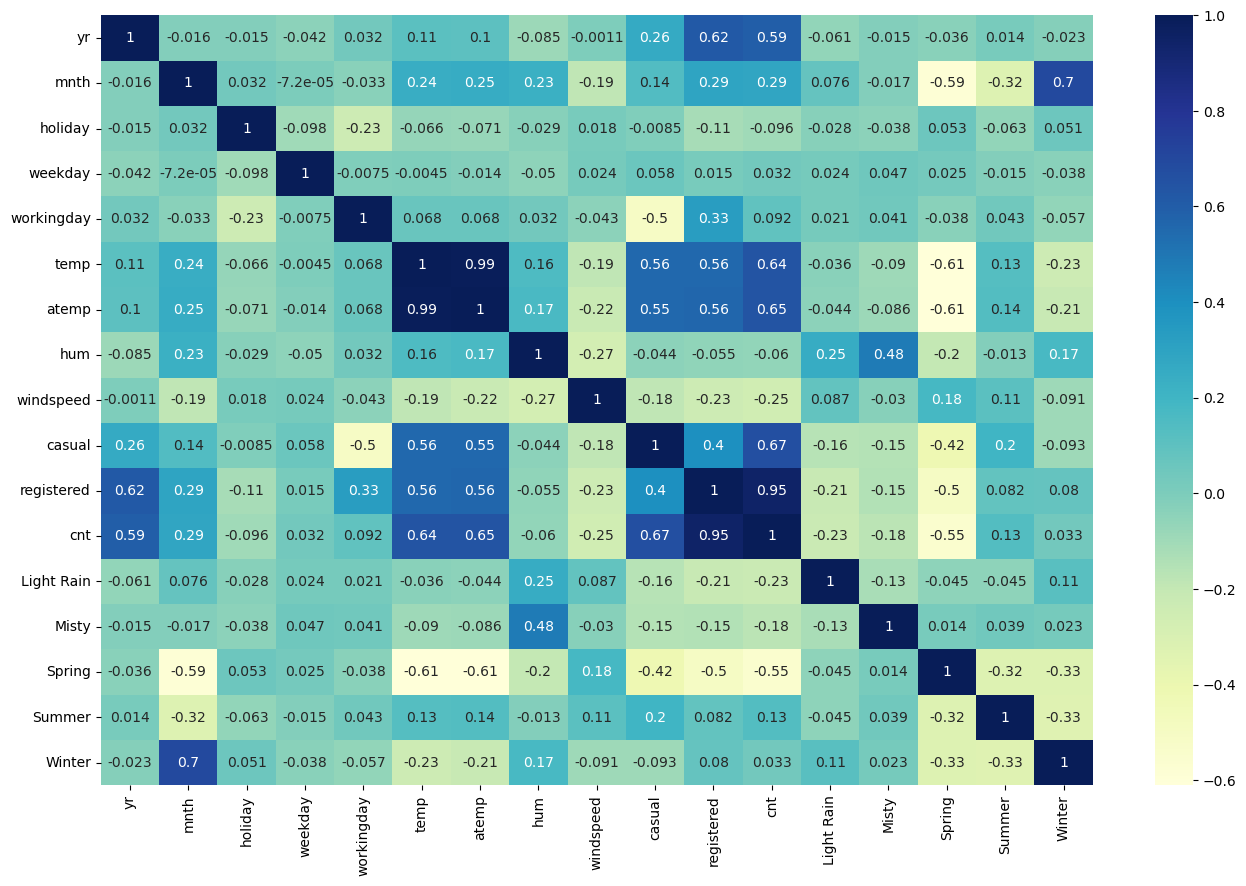

In [23]:
# Visualising Correlation between different Variables

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 3. Training/Building the Model

In [24]:
#Initilize the Linear Regression Model.
#Creating y_train(Target variable) and X_train(all other independent variables).
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
# RFE(Recursive Feature Elimination).
# Use RFE(Recursive Feature Elimination) to limit the variables.

#Initilzing RFE and giving number of features to select.
#Fit the data to RFE
#I took all the columns in RFE, as the columns are less and we can better to understand.
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
# Selecting the suitable Columns based on rankings from RFE.
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('Light Rain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [27]:
#Columns that were selcted by RFE
num_vars = X_train.columns[rfe.support_]
X_train_lm = X_train[num_vars]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Light Rain,Misty,Spring,Summer,Winter
653,1.0,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0,0,0,0,1
576,1.0,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0
426,1.0,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0,1,1,0,0
728,1.0,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0,0,1,0,0
482,1.0,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.454545,0,0.166667,1,0.824514,0.762183,0.605840,0.355596,0.309357,0.812446,0,1,0,1,0
578,1.0,1,0.636364,0,0.666667,1,0.863973,0.824359,0.679690,0.187140,0.298994,0.903552,0,0,0,0,0
53,1.0,0,0.090909,0,0.500000,1,0.202618,0.218747,0.435939,0.111379,0.041756,0.253826,0,0,1,0,0
350,1.0,0,1.000000,0,1.000000,0,0.248216,0.223544,0.577930,0.431816,0.083206,0.352873,0,1,0,0,1


In [28]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'Light Rain', 'Misty',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [29]:
# Columns that were not selected by RFE
X_train.columns[~rfe.support_]


Index([], dtype='object')

In [30]:
X_train_rfe = X_train[col]

In [31]:
# Taking RFE selected features and adding Constant to it.
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
# Initilize a OLS(Ordinary Least Squares regression) using updated X_train and y_train and fit the model.
# Once fitted, we can use an inbuilt method called summary() to check p value, R^2 value and other important values.
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.085e+29
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                 16213.
No. Observations:                 510   AIC:                        -3.239e+04
Df Residuals:                     493   BIC:                        -3.232e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-16   1.67e-15      0.542      0.5

In [34]:
# Calculate the VIFs for the model.
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
5,temp,393.12
6,atemp,367.25
10,registered,42.84
7,hum,30.26
1,mnth,12.73
4,workingday,10.49
9,casual,9.82
0,yr,6.02
8,windspeed,5.23
15,Winter,5.06


In [35]:
# you will use two main parameters to judge the insignificant variables, the p-values and the VIFs.
# We generally want a VIF and p value should be less than 5. So there are clearly some variables we need to drop.

# we could have :
#- high p-value, high VIF
# - high-low :
#    - high p-value, low VIF : remove these first
#    - low p-value, high VIF : remove these after the ones above
# - low p, low VIF

In [36]:
# Dropping temp column , it has both p value and VIF value greater than 5.
X_train_lm = X_train_lm.drop('temp', axis=1)

In [37]:
# create another model
X_train_lm_sm = sm.add_constant(X_train_lm)

# create model
lm = sm.OLS(y_train, X_train_lm_sm)

# fit
lm_model = lm.fit()

# Summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.315e+31
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:13:08   Log-Likelihood:                 17419.
No. Observations:                 510   AIC:                        -3.481e+04
Df Residuals:                     494   BIC:                        -3.474e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.967e-16   1.56e-16     -3.836      0.000   -9.02e-16   -2.91e-16
yr          1.162e-16   5.52e-17      2.104      0.036    7.71e-18    2.25e-16
mnth        1.908e-16   1.01e-16      1.898      0.058   -6.67e-18    3.88e-16
holiday    -1.388e-17   1.07e-16     -0.130      0.897   -2.24e-16    1.96e-16
weekday     -2.22e-16   4.91e-17     -4.522      0.000   -3.19e-16   -1.26e-16
workingday  1.943e-16   6.34e-17      3.063      0.002    6.97e-17    3.19e-16
atemp       1.388e-16   1.61e-16      0.863      0.388   -1.77e-16    4.55e-16
hum         4.302e-16   1.53e-16      2.813      0.005     1.3e-16    7.31e-16
windspeed   6.245e-17   1.07e-16      0.585      0.559   -1.47e-16    2.72e-16
casual         0.3775   1.54e-16   2.45e+15      0.000       0.377       0.377
registered     0.7968   1.85e-16   4.31e+15      0.000       0.797       0.797
Light Rain  5.967e-16   1.15e-16      5.191      0.000    3.71e-16    8.23e-16
Misty       9.368e-17   4.36e-17      2.149      0.032    8.01e-18    1.79e-16
Spring       2.29e-16   8.76e-17      2.614      0.009    5.69e-17    4.01e-16
Summer     -2.082e-16   5.92e-17     -3.519      0.000   -3.24e-16   -9.19e-17
Winter      9.021e-17   6.97e-17      1.294      0.196   -4.67e-17    2.27e-16
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.626
Skew:                           0.030   Prob(JB):                        0.731
Kurtosis:                       3.161   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Calculate the VIFs for the new model.
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
9,registered,42.60
6,hum,29.98
5,atemp,29.15
1,mnth,12.71
4,workingday,10.44
8,casual,9.62
0,yr,5.99
7,windspeed,4.81
14,Winter,4.52
12,Spring,4.29


In [39]:
# Dropping atemp column , it has both p value and VIF value greater than 5.
X_train_lm = X_train_lm.drop('atemp', axis=1)

In [40]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.389e+30
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:13:08   Log-Likelihood:                 17217.
No. Observations:                 510   AIC:                        -3.440e+04
Df Residuals:                     495   BIC:                        -3.434e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.163e-17   2.23e-16     -0.186      0.852    -4.8e-16    3.97e-16
yr         -1.162e-16   7.85e-17     -1.481      0.139    -2.7e-16     3.8e-17
mnth        1.388e-16   1.49e-16      0.930      0.353   -1.54e-16    4.32e-16
holiday    -3.678e-16   1.58e-16     -2.322      0.021   -6.79e-16   -5.66e-17
weekday    -9.021e-17   7.26e-17     -1.243      0.214   -2.33e-16    5.24e-17
workingday   2.29e-16    9.4e-17      2.435      0.015    4.42e-17    4.14e-16
hum        -2.359e-16   2.18e-16     -1.080      0.281   -6.65e-16    1.93e-16
windspeed   1.388e-16   1.58e-16      0.881      0.379   -1.71e-16    4.48e-16
casual         0.3775   2.18e-16   1.73e+15      0.000       0.377       0.377
registered     0.7968   2.59e-16   3.07e+15      0.000       0.797       0.797
Light Rain  3.539e-16    1.7e-16      2.079      0.038    1.95e-17    6.88e-16
Misty       1.379e-16   6.47e-17      2.132      0.033    1.08e-17    2.65e-16
Spring      2.082e-16   1.15e-16      1.810      0.071   -1.78e-17    4.34e-16
Summer      5.551e-17   8.11e-17      0.684      0.494   -1.04e-16    2.15e-16
Winter              0   8.25e-17          0      1.000   -1.62e-16    1.62e-16
==============================================================================
Omnibus:                       50.343   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.302
Skew:                           0.777   Prob(JB):                     1.09e-14
Kurtosis:                       3.783   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
8,registered,36.19
5,hum,22.81
1,mnth,12.54
4,workingday,10.32
7,casual,8.22
0,yr,5.33
6,windspeed,4.49
11,Spring,3.58
3,weekday,3.32
13,Winter,3.00


In [42]:
# Dropping hum column , it has both p value and VIF value greater than 5.
X_train_lm = X_train_lm.drop('hum', axis=1)

In [43]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.171e+29
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:13:09   Log-Likelihood:                 16432.
No. Observations:                 510   AIC:                        -3.284e+04
Df Residuals:                     496   BIC:                        -3.278e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.305e-15    8.1e-16     -1.611      0.108    -2.9e-15    2.86e-16
yr          3.955e-16   3.65e-16      1.083      0.279   -3.22e-16    1.11e-15
mnth        1.003e-15   6.91e-16      1.451      0.147   -3.55e-16    2.36e-15
holiday     1.145e-16   7.38e-16      0.155      0.877   -1.33e-15    1.56e-15
weekday     3.608e-16   3.36e-16      1.073      0.284      -3e-16    1.02e-15
workingday  1.332e-15   4.38e-16      3.042      0.002    4.72e-16    2.19e-15
windspeed   8.604e-16   7.03e-16      1.224      0.222   -5.21e-16    2.24e-15
casual         0.3775   1.01e-15   3.73e+14      0.000       0.377       0.377
registered     0.7968   1.21e-15    6.6e+14      0.000       0.797       0.797
Light Rain  1.041e-16   7.42e-16      0.140      0.888   -1.35e-15    1.56e-15
Misty        7.13e-16   2.54e-16      2.810      0.005    2.14e-16    1.21e-15
Spring        1.2e-15   5.35e-16      2.242      0.025    1.49e-16    2.25e-15
Summer      7.078e-16   3.78e-16      1.873      0.062   -3.45e-17    1.45e-15
Winter      5.551e-16   3.84e-16      1.444      0.149      -2e-16    1.31e-15
==============================================================================
Omnibus:                        2.421   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.498
Skew:                           0.152   Prob(JB):                        0.287
Kurtosis:                       2.840   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
7,registered,34.52
1,mnth,10.29
4,workingday,10.09
6,casual,7.61
0,yr,5.05
5,windspeed,4.49
3,weekday,3.32
12,Winter,2.99
10,Spring,2.39
11,Summer,2.23


In [45]:
# Dropping mnth column , it has both p value and VIF value greater than 5.
X_train_lm = X_train_lm.drop('mnth', axis=1)

In [46]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.249e+29
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:13:09   Log-Likelihood:                 16417.
No. Observations:                 510   AIC:                        -3.281e+04
Df Residuals:                     497   BIC:                        -3.275e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.159e-16   7.18e-16      1.275      0.203   -4.95e-16    2.33e-15
yr          7.216e-16   3.74e-16      1.928      0.054   -1.36e-17    1.46e-15
holiday     5.169e-16   7.58e-16      0.682      0.496   -9.73e-16    2.01e-15
weekday     4.857e-16   3.45e-16      1.406      0.160   -1.93e-16    1.16e-15
workingday  3.504e-16   4.49e-16      0.780      0.436   -5.32e-16    1.23e-15
windspeed  -1.943e-16   7.23e-16     -0.269      0.788   -1.61e-15    1.23e-15
casual         0.3775   1.04e-15   3.63e+14      0.000       0.377       0.377
registered     0.7968   1.24e-15   6.44e+14      0.000       0.797       0.797
Light Rain -3.053e-16   7.63e-16     -0.400      0.689    -1.8e-15    1.19e-15
Misty       2.802e-16   2.61e-16      1.074      0.283   -2.32e-16    7.93e-16
Spring      4.857e-17   4.64e-16      0.105      0.917   -8.64e-16    9.61e-16
Summer      3.053e-16   3.35e-16      0.912      0.362   -3.52e-16    9.63e-16
Winter      2.498e-16   3.46e-16      0.722      0.471    -4.3e-16    9.29e-16
==============================================================================
Omnibus:                       52.901   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.322
Skew:                           0.086   Prob(JB):                     0.000286
Kurtosis:                       2.140   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
6,registered,31.18
3,workingday,10.07
5,casual,7.34
0,yr,4.64
4,windspeed,4.20
2,weekday,3.29
9,Spring,2.21
10,Summer,1.95
11,Winter,1.85
8,Misty,1.57


In [48]:
# Dropping workingday column , it has both p value and VIF value greater than 5.
X_train_lm = X_train_lm.drop('workingday', axis=1)

In [49]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.701e+29
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:13:10   Log-Likelihood:                 16428.
No. Observations:                 510   AIC:                        -3.283e+04
Df Residuals:                     498   BIC:                        -3.278e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.901e-15   6.86e-16      2.772      0.006    5.54e-16    3.25e-15
yr          6.696e-16   3.43e-16      1.950      0.052   -5.14e-18    1.34e-15
holiday    -8.153e-17   7.22e-16     -0.113      0.910    -1.5e-15    1.34e-15
weekday    -2.331e-15   3.38e-16     -6.898      0.000      -3e-15   -1.67e-15
windspeed   9.159e-16   7.07e-16      1.295      0.196   -4.73e-16    2.31e-15
casual         0.3775   6.76e-16   5.59e+14      0.000       0.377       0.377
registered     0.7968   9.24e-16   8.63e+14      0.000       0.797       0.797
Light Rain  8.327e-17   7.37e-16      0.113      0.910   -1.36e-15    1.53e-15
Misty      -6.765e-17   2.54e-16     -0.266      0.790   -5.67e-16    4.32e-16
Spring      1.291e-15   4.54e-16      2.844      0.005    3.99e-16    2.18e-15
Summer       1.61e-15   3.25e-16      4.948      0.000    9.71e-16    2.25e-15
Winter      1.596e-15   3.29e-16      4.854      0.000     9.5e-16    2.24e-15
==============================================================================
Omnibus:                       19.516   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.028
Skew:                           0.263   Prob(JB):                      0.00148
Kurtosis:                       2.421   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
5,registered,8.69
3,windspeed,4.17
0,yr,3.55
2,weekday,3.29
4,casual,3.29
8,Spring,2.04
9,Summer,1.88
10,Winter,1.81
7,Misty,1.51
6,Light Rain,1.13


In [51]:
# Dropping registered column , it has VIF value greater than 5.
X_train_lm = X_train_lm.drop('registered', axis=1)

In [52]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.72e-177
Time:                        23:13:10   Log-Likelihood:                 471.80
No. Observations:                 510   AIC:                            -921.6
Df Residuals:                     499   BIC:                            -875.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4636      0.016     28.180      0.000       0.431       0.496
yr             0.2183      0.009     24.354      0.000       0.201       0.236
holiday       -0.0959      0.028     -3.480      0.001      -0.150      -0.042
weekday        0.0326      0.013      2.510      0.012       0.007       0.058
windspeed     -0.1360      0.027     -5.109      0.000      -0.188      -0.084
casual         0.3200      0.026     12.325      0.000       0.269       0.371
Light Rain    -0.2346      0.026     -8.865      0.000      -0.287      -0.183
Misty         -0.0663      0.009     -7.085      0.000      -0.085      -0.048
Spring        -0.2386      0.014    -17.171      0.000      -0.266      -0.211
Summer        -0.0531      0.012     -4.305      0.000      -0.077      -0.029
Winter        -0.0477      0.013     -3.813      0.000      -0.072      -0.023
==============================================================================
Omnibus:                       40.382   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.966
Skew:                          -0.604   Prob(JB):                     7.03e-13
Kurtosis:                       4.083   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
3,windspeed,3.90
2,weekday,2.92
4,casual,2.78
0,yr,2.17
7,Spring,2.01
8,Summer,1.85
9,Winter,1.67
6,Misty,1.51
5,Light Rain,1.10
1,holiday,1.05


## 4. Residual Analysis.

In [54]:
# Predicting the Y_train value(Count) using the model
y_train_pred = lm_model.predict(X_train_lm_sm)
y_train_pred

653    0.693938
576    0.751066
426    0.467991
728    0.388515
482    0.678553
         ...   
526    0.618636
578    0.773932
53     0.239552
350    0.350075
79     0.316499
Length: 510, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_10360\967933463.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

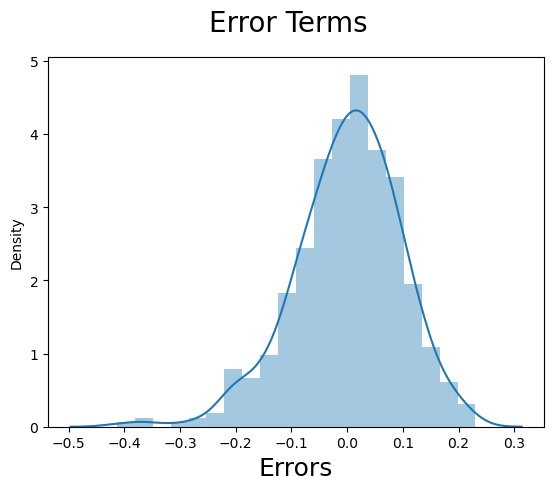

In [55]:
# Calculating Residual value
# Visualising the residual value to check if the model not failing any conditions, Mean should exactly fitting to zero.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## 5. Predictions and Evaluation on the test set.

In [56]:
df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light Rain,Misty,Spring,Summer,Winter
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,1,0,0,0
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,0,0,1,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,1,0,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,2,0,0,0,10.899153,13.22605,68.7917,11.791732,318,2629,2947,0,1,1,0,0
702,1,12,0,2,1,19.509153,23.45270,73.3750,11.666643,551,6055,6606,0,0,0,0,1
127,0,5,0,0,0,21.661653,25.94665,63.1667,5.000712,1401,2932,4333,0,0,0,1,0
640,1,10,0,3,1,26.957500,29.95665,79.3750,4.458569,728,6844,7572,0,1,0,0,1


In [57]:
# create a list of numeric vars.
# fit on data
var_list = ['mnth','weekday','temp','atemp','hum','windspeed','casual','registered','cnt']
df_test[var_list] = scaler.transform(df_test[var_list])

In [58]:
# Extracting y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Light Rain,Misty,Spring,Summer,Winter
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0,1,0,0,0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0,0,0,1,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0,1,0,0,1
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0,0,0,1,0


In [60]:
#  Dropping all the Columns that we have dropped in the training of the model.
X_test = X_test.drop(['workingday','temp','atemp','hum','registered','mnth'], axis=1)
X_test.head()

,yr,holiday,weekday,windspeed,casual,Light Rain,Misty,Spring,Summer,Winter
184,0,1,0.166667,0.084219,0.933557,0,1,0,0,0
535,1,0,0.500000,0.153728,0.265163,0,0,0,1,0
299,0,0,0.666667,0.334206,0.072539,0,1,0,0,1
221,0,0,0.500000,0.339570,0.268820,0,0,0,0,0
152,0,0,0.666667,0.537414,0.223712,0,0,0,1,0


In [61]:
# Adding the constant to X_test and making Predictions to find y_pred value.
X_test_sm = sm.add_constant(X_test)

In [62]:
# predict
y_pred = lm_model.predict(X_test_sm)
y_pred

184    0.594171
535    0.709104
299    0.349082
221    0.519771
152    0.430734
         ...   
400    0.368831
702    0.660116
127    0.537532
640    0.647968
72     0.237637
Length: 219, dtype: float64

In [63]:
# Model Evaluation
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test,y_pred)
print(r_squared_train*100)
print(r_squared_test*100)

81.71691294899844
80.17439125197077


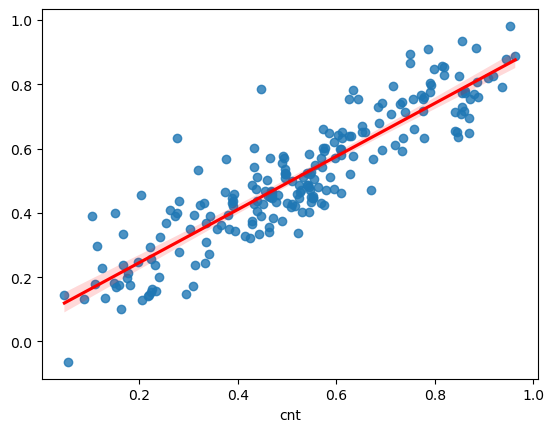

In [64]:
# Plotting Y_test vs Y_pred Scatter plot.
plt.figure()
sns.regplot(x=y_test, y=y_pred,fit_reg=True, line_kws={"color":"red"})
plt.show()

In [65]:
round(lm_model.params,4)

const         0.4636
yr            0.2183
holiday      -0.0959
weekday       0.0326
windspeed    -0.1360
casual        0.3200
Light Rain   -0.2346
Misty        -0.0663
Spring       -0.2386
Summer       -0.0531
Winter       -0.0477
dtype: float64

In [66]:
# The Best Fit Line is (0.4636 +0.2183 year +(-0.0959) * holiday +  0.0326 * weekday + -0.1360 * windspeed + (0.3200) * casual + (-0.2346) * Light Rain + (-0.0663) * Misty + (-0.2386) * Spring +(-0.0531)*Summer )+ (-0.0477) * Winter.

In [67]:
# Calculating Adjusted-R^2 value for Train and Test a dataset
adjusted_r2_train = round(1-(1-r_squared_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2_test = round(1-(1-r_squared_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_train)
print(adjusted_r2_test)

0.8112
0.7922
